<div style="display: flex; justify-content: space-between; align-items: center;">
    <div style="width: 20%; text-align: left; margin-left: 10px;">
        <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRyUtYn-FHY0YTZMTs9yRu8I17EMEVCa_zXow&s" alt="Web Fundación Progreso y Salud" style="width: 100%;"/>
    </div>
    <div style="width: 60%; margin-right: 70px;">
        <p style="text-align: right; font-weight: bold; font-size: 2em; margin-top: 30px;">
            Descriptive analysis
        </p>
        <p style="text-align: right; color: #666">
            Project: MedicoderMESH
        </p>
        <p style="text-align: right; color: #666">
            Juan Luis González Rodríguez
        </p>
    </div>
</div>

Exploratory MESH Corpus analysis

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os

from transformers import RobertaTokenizer

In [26]:
plt.style.use('seaborn-v0_8-whitegrid')

In [27]:
df =  pd.read_csv('../data/projects_pubmed.csv', quotechar='"', skipinitialspace=True)

In [28]:
row1 = df.iloc[0]

In [29]:
print('PMID:', row1['PMID'])
print('MESH_MAJOR_TOPIC:', row1['MESH_MAJOR_TOPIC'])
print('TITLE:', row1['TITLE'])
print('ABSTRACT:', row1['ABSTRACT'])
print('MESH_TUPLE:', row1['MESH_TUPLE'])

PMID: 27041066
MESH_MAJOR_TOPIC: Abdomen, Acute
TITLE: Urgencias abdominales en pediatría
ABSTRACT: La sintomatología abdominal es uno de los motivos de consulta más frecuente en la urgencia pediátrica, siendo el dolor abdominal el síntoma más referido. Habitualmente, para el diagnóstico es suficiente con una anamnesis y exploración física precisas. Para el radiólogo es útil conocer cuáles son las patologías abdominales más frecuentes por franjas de edad, lo cual permite acotar el diagnóstico diferencial. Cuando esté indicado realizar alguna prueba de imagen, la ecografía es la técnica inicial en la mayoría de los casos; permite realizar el diagnóstico o añadir información relevante, con las ventajas conocidas de esta técnica. La radiografía simple hoy en día queda reservada cuando existe sospecha de perforación, obstrucción intestinal o ingesta de cuerpo extraño. Conviene recordar, que el dolor abdominal puede ser secundario a una neumonía basal. La TC queda reservada para indicacione

In [30]:
df.shape

(22934, 5)

# MESH MAJOR TOPIC

In [31]:
n_mesh = len(df['MESH_MAJOR_TOPIC'].unique())
print(f'There are {n_mesh} uniques MESH terms in the corpus.')

There are 3078 uniques MESH terms in the corpus.


In [32]:
pubs_per_mesh = df['MESH_MAJOR_TOPIC'].value_counts().value_counts().sort_index().rename("publications_per_mesh")
pubs_per_mesh.rename_axis('n_publications')

n_publications
1     669
2     473
3     314
4     218
5     182
6     148
7     116
8     102
9     102
10     86
11     67
12     61
13     53
14     34
15     34
16     37
17     27
18     36
19     28
20     25
21     27
22     17
23     13
24     14
25     15
26     16
27     12
28      9
29     17
30     14
31      6
32      7
33      8
34      8
35      5
36      3
37      7
38      3
39      4
40      7
41      4
42      5
43      3
44      1
45      3
46      6
47      4
48      4
49      6
50     18
Name: publications_per_mesh, dtype: int64

In [33]:
pubs_per_mesh.sum()

3078

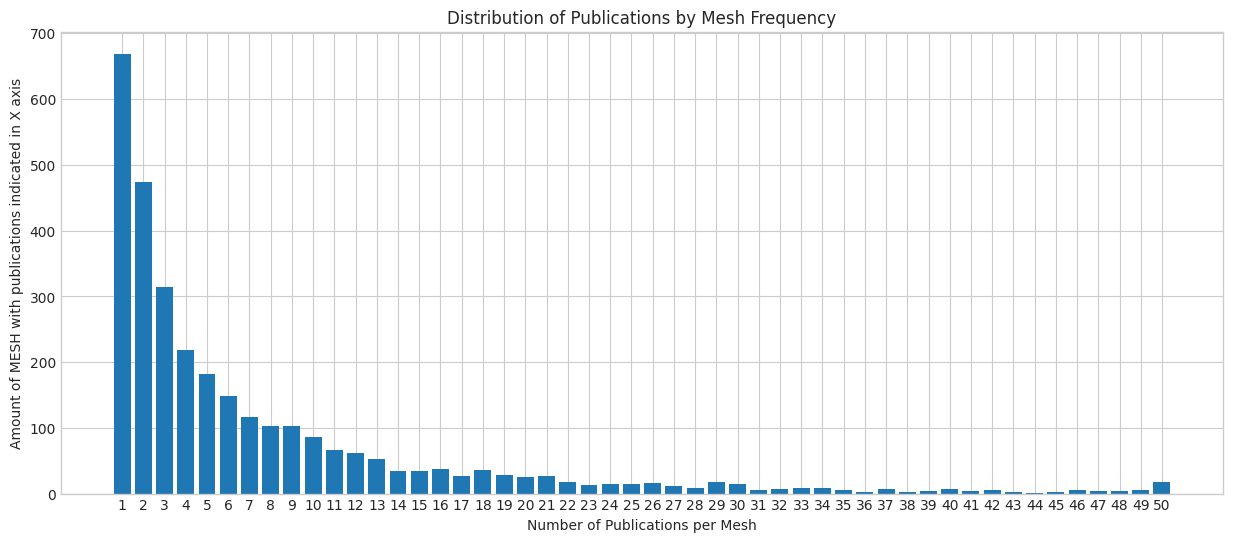

In [34]:
fig = plt.figure(figsize=(15, 6))

plt.bar(pubs_per_mesh.index, pubs_per_mesh)
plt.xticks(pubs_per_mesh.index)

plt.xlabel('Number of Publications per Mesh')
plt.ylabel('Amount of MESH with publications indicated in X axis')
plt.title('Distribution of Publications by Mesh Frequency')

plt.show()

In [35]:
print(f'There are {len(os.listdir("../data/meshs_json"))-pubs_per_mesh.sum()} mesh terms related with diagnosis (codes starting with C, F03) without publications writed in spanish.')

There are 2077 mesh terms related with diagnosis (codes starting with C, F03) without publications writed in spanish.


# PMID

Let's check if there're repeated publications.

In [36]:
df['PMID']

0        27041066
1        26875476
2        30772003
3        30497686
4        28254168
           ...   
22929    29169978
22930    25217064
22931    29622414
22932    29866441
22933    31371098
Name: PMID, Length: 22934, dtype: int64

In [37]:
df['PMID'].value_counts()

PMID
28110901    6
12724079    6
24456908    6
19818662    6
26164135    6
           ..
28623033    1
26306956    1
21514862    1
20362521    1
29622414    1
Name: count, Length: 16114, dtype: int64

We see that we have repeated values; some publications appear 6 times in the dataframe. Let's check in detail what is happening.

In [38]:
df[df.duplicated(subset=['PMID'], keep=False)].sort_values(by='PMID').head(20)


,PMID,MESH_MAJOR_TOPIC,TITLE,ABSTRACT,MESH_TUPLE
412,1295840,Iron Deficiencies,Asociación entre carencia de hierro y trastorn...,Resumen Con vista a la prevención de futuros p...,"(Prevalence, Analysis of Variance, Spain, Huma..."
9194,1295840,Learning Disabilities,Asociación entre carencia de hierro y trastorn...,Resumen Con vista a la prevención de futuros p...,"(Prevalence, Analysis of Variance, Spain, Huma..."
10224,7582436,Meningocele,Meningocele intratorácico en la enfermedad de ...,La causa más frecuente de tumores en el medias...,"(Adult, Meningocele, Neurofibromatosis 1, Huma..."
11241,7582436,Neurofibromatosis 1,Meningocele intratorácico en la enfermedad de ...,La causa más frecuente de tumores en el medias...,"(Adult, Meningocele, Neurofibromatosis 1, Huma..."
15599,7582438,Thoracic Injuries,Hemotórax traumático tratado mediante cirugía ...,La introducción de la cirugía toracoscópica vi...,"(Accidental Falls, Humans, Hemothorax, Video R..."
7400,7582438,Hemothorax,Hemotórax traumático tratado mediante cirugía ...,La introducción de la cirugía toracoscópica vi...,"(Accidental Falls, Humans, Hemothorax, Video R..."
4201,7627427,Cryptococcosis,Criptococosis sistémica y neumocistosis en un ...,La criptococosis es una de las principales inf...,"(AIDS-Related Opportunistic Infections, Adult,..."
12797,7627427,"Pneumonia, Pneumocystis",Criptococosis sistémica y neumocistosis en un ...,La criptococosis es una de las principales inf...,"(AIDS-Related Opportunistic Infections, Adult,..."
1467,7704392,Aspergillosis,Tratamiento quirúrgico del aspergiloma pulmonar,La aspergilosis pulmonar puede considerarse ho...,"(Adult, Lung Diseases, Fungal, Aspergillosis, ..."
9570,7704392,"Lung Diseases, Fungal",Tratamiento quirúrgico del aspergiloma pulmonar,La aspergilosis pulmonar puede considerarse ho...,"(Adult, Lung Diseases, Fungal, Aspergillosis, ..."


As we can see, these are the same publications but with different major topics. Therefore, we will not consider them as errors and will leave them in the dataframe. However, we will review if there are completely duplicated rows in the dataframe.

In [39]:
df[df.duplicated(keep=False)]

,PMID,MESH_MAJOR_TOPIC,TITLE,ABSTRACT,MESH_TUPLE


There are no completely duplicated rows in the dataframe

In [40]:
df[df['PMID'].duplicated()].sort_values(by='PMID')['PMID']

9194      1295840
11241     7582436
15599     7582438
12797     7627427
9570      7704392
           ...   
426      38277734
12543    38402070
21107    38423944
10736    38423944
7875     38508875
Name: PMID, Length: 6820, dtype: int64

Some publications appear more than once in the dataset. This is because the same publication appears twice or more times in the dataset, but with different MESH terms. This is not a problem, as we can use the same publication to train the model with different MESH terms.

# Subset based in amount of publications

Based on the distribution of the number of publications grouped by Mesh, Mesh terms with fewer than 10 publications will be dropped from the data frame to avoid under-representation, while those with 10 or more publications will be retained.

In [41]:
n = 10
corpus_df = df[df['MESH_MAJOR_TOPIC'].map(df['MESH_MAJOR_TOPIC'].value_counts()) == n]

corpus_df.reset_index(inplace=True)

In [42]:
corpus_df.head()

,index,PMID,MESH_MAJOR_TOPIC,TITLE,ABSTRACT,MESH_TUPLE
0,186,27156484,Zika Virus Infection,Infección por el virus Zika o el futuro de las...,El virus Zika es un Flavivirus filogenéticamen...,"(Zika Virus, Disease Reservoirs, Humans, Phylo..."
1,187,30797578,Zika Virus Infection,La enfermedad por virus Zika en España. Result...,Introducción y objetivo La enfermedad por viru...,"(Population Surveillance, Seroconversion, Inse..."
2,188,29720353,Zika Virus Infection,Neurorretinopatía autoinmune secundaria a infe...,"Caso clínico Mujer de 40 años, infectada 6 mes...","(Adult, Humans, Autoimmune Diseases of the Ner..."
3,189,31679764,Zika Virus Infection,Manifestaciones oftálmicas de las infecciones ...,Introducción y objetivos Las infecciones por a...,"(Sex Distribution, Adult, Symptom Assessment, ..."
4,190,32660804,Zika Virus Infection,Experiencia de mujeres con infección prenatal ...,Objetivo Comprender el proceso de toma de deci...,"(Pregnancy Complications, Infectious, Zika Vir..."


In [43]:
print(corpus_df.shape)

(860, 6)


In [44]:
unique_meshes = len(corpus_df['MESH_MAJOR_TOPIC'].unique())
print(f'There are {unique_meshes} mesh with {n} publications associated.')

There are 86 mesh with 10 publications associated.


In [45]:
corpus_df[corpus_df.duplicated(subset=['PMID'], keep=False)].sort_values(by='PMID')

,index,PMID,MESH_MAJOR_TOPIC,TITLE,ABSTRACT,MESH_TUPLE
614,16988,11787403,Xanthomatosis,Xantogranuloma sintomático del ventrículo lateral,Los xantogranulomas del ventrículo lateral son...,"(Granuloma, Humans, Lateral Ventricles, Cranio..."
605,16708,11787403,Vision Disorders,Xantogranuloma sintomático del ventrículo lateral,Los xantogranulomas del ventrículo lateral son...,"(Granuloma, Humans, Lateral Ventricles, Cranio..."
233,6636,11787403,Granuloma,Xantogranuloma sintomático del ventrículo lateral,Los xantogranulomas del ventrículo lateral son...,"(Granuloma, Humans, Lateral Ventricles, Cranio..."
397,11827,12464164,Otitis Media with Effusion,Otitis media serosa y alergia en nuestra área ...,Hemos estudiado la incidencia de enfermedades ...,"(Rhinitis, Allergic, Perennial, Antibody Speci..."
249,6803,12464164,"Rhinitis, Allergic, Seasonal",Otitis media serosa y alergia en nuestra área ...,Hemos estudiado la incidencia de enfermedades ...,"(Rhinitis, Allergic, Perennial, Antibody Speci..."
633,17517,15826581,"Fatigue Syndrome, Chronic",Síndrome de fatiga crónica e hipersensibilidad...,Fundamento y objetivo El síndrome de fatiga cr...,"(Adult, Fatigue Syndrome, Chronic, Humans, Ado..."
729,19767,15826581,Multiple Chemical Sensitivity,Síndrome de fatiga crónica e hipersensibilidad...,Fundamento y objetivo El síndrome de fatiga cr...,"(Adult, Fatigue Syndrome, Chronic, Humans, Ado..."
512,14297,16324620,Osteosarcoma,Factores de riesgo para los tumores óseos mali...,Introducción El cáncer es el resultado final d...,"(Adult, Humans, Bone Neoplasms, Adolescent, Ri..."
503,14276,16324620,"Sarcoma, Ewing",Factores de riesgo para los tumores óseos mali...,Introducción El cáncer es el resultado final d...,"(Adult, Humans, Bone Neoplasms, Adolescent, Ri..."
727,19765,16883665,Multiple Chemical Sensitivity,Hipersensibilidad química múltiple en el síndr...,El síndrome del edificio enfermo se refiere a ...,"(Fatigue Syndrome, Chronic, Humans, Middle Age..."


In the subset consisting of 10 publications per Mesh term, there are still some publications that are duplicated with a different Mesh Major term. It will be kept.

# TITLE

In [46]:
corpus_df['TITLE']

0      Infección por el virus Zika o el futuro de las...
1      La enfermedad por virus Zika en España. Result...
2      Neurorretinopatía autoinmune secundaria a infe...
3      Manifestaciones oftálmicas de las infecciones ...
4      Experiencia de mujeres con infección prenatal ...
                             ...                        
855    Sesión de hemodiálisis: la tormenta perfecta p...
856    Relación entre hiperostosis esquelética idiopá...
857    Prevalencia de calcificación arterial y factor...
858    Importancia del índice tobillo-brazo en la rec...
859    Relación entre cistatina C y calcificación cor...
Name: TITLE, Length: 860, dtype: object

In [47]:
corpus_df['TITLE'].map(lambda x: len(x))

0       71
1      121
2       73
3       68
4      101
      ... 
855     75
856    164
857    125
858    137
859    102
Name: TITLE, Length: 860, dtype: int64

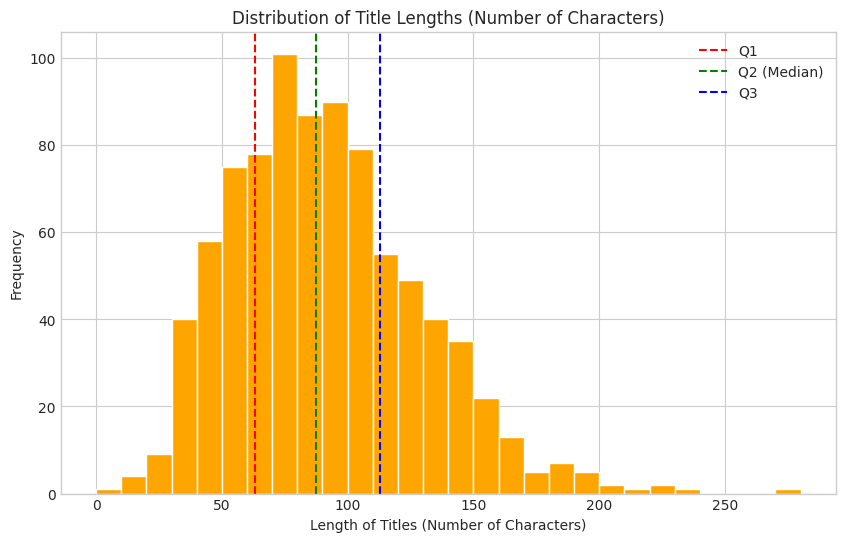

In [48]:
len_chr_title = corpus_df['TITLE'].map(lambda x: len(x))

# Calculate quartiles
q1 = np.percentile(len_chr_title, 25)
q2 = np.percentile(len_chr_title, 50)
q3 = np.percentile(len_chr_title, 75)

# Define histogram properties
fig = plt.figure(figsize=(10, 6))
bin_width = 10
list_bins= list(range(0, len_chr_title.max() + bin_width, bin_width))

# Plot histogram
plt.hist(len_chr_title, bins=list_bins, ec='w', color='orange')

# Add quartile lines
plt.axvline(q1, color='r', linestyle='--', label='Q1')
plt.axvline(q2, color='g', linestyle='--', label='Q2 (Median)')
plt.axvline(q3, color='b', linestyle='--', label='Q3')

plt.xlabel('Length of Titles (Number of Characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Title Lengths (Number of Characters)')

# Add legend
plt.legend()

plt.xticks(np.arange(0, len_chr_title.max() + 1, 50))


plt.show()

In [49]:
corpus_df[corpus_df['TITLE'].map(lambda x: len(x)) < 20]

,index,PMID,MESH_MAJOR_TOPIC,TITLE,ABSTRACT,MESH_TUPLE
10,415,28285907,Elbow Injuries,Luxación de codo,La luxación de codo es la luxación más frecuen...,"(Humans, Elbow Injuries, Ambulatory Care, Join..."
372,11145,21349470,Nervous System Diseases,Neurolaringología,La neuroanatomía de la voz y el habla es compl...,"(Diagnostic Techniques, Neurological, Laryngea..."
460,13131,16447594,Priapism,Priapismo,Priapismo El priapismo ha sido definido por la...,"(Algorithms, Priapism, Male, Humans)"
610,16984,21835391,Xanthomatosis,Xantoma basilingual,Los xantomas son tumores benignos dismetabólic...,"(Adult, Humans, Tongue Diseases, Xanthomatosis..."
651,18401,21458830,Hepatitis E,Hepatitis crónica E,El virus de la hepatitis E es un virus ARN del...,"(Europe, Transfusion Reaction, Asia, Endemic D..."


Some titles are discovered to be identical to the text of the Mesh Major topic.

The tokenization of titles will be addressed in the upcoming cells

In [50]:
random.seed(123)

index_random = random.randint(0, corpus_df.shape[0])
print('index:', index_random)

title_A = corpus_df.loc[index_random, 'TITLE']
print(f'A sample title:\n{title_A}')

index: 53
A sample title:
Evaluación de los pacientes candidatos a implante transcatéter de válvula aórtica mediante tomografía computarizada multidetector


In [51]:
tokenizer = RobertaTokenizer.from_pretrained('PlanTL-GOB-ES/roberta-base-biomedical-clinical-es')

/home/juanluisgonzalez/.local/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [52]:
print(tokenizer.tokenize(title_A))

['ĠEvaluaciÃ³n', 'Ġde', 'Ġlos', 'Ġpacientes', 'Ġcandidatos', 'Ġa', 'Ġimplante', 'Ġtrans', 'catÃ©ter', 'Ġde', 'ĠvÃ¡lvula', 'ĠaÃ³rtica', 'Ġmediante', 'ĠtomografÃŃa', 'Ġcomputarizada', 'Ġmulti', 'detec', 'tor']


In [53]:
print(tokenizer.encode_plus(title_A))

{'input_ids': [0, 7137, 262, 318, 582, 10751, 269, 7376, 922, 40192, 262, 9681, 8322, 1366, 11102, 14735, 2817, 39078, 395, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [54]:
# Get the title encoded
title_A_tk = tokenizer.encode_plus(title_A)['input_ids']

# Decode the title
title_A_decoded = tokenizer.decode(title_A_tk)
print(f'Title decoded:\n{title_A_decoded}')

# Original title
print(f'Title original:\n{title_A}')

2024-07-23 12:10:10.872784: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-23 12:10:15.097570: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-23 12:10:15.100305: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-23 12:10:22.161102: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Title decoded:
<s> Evaluación de los pacientes candidatos a implante transcatéter de válvula aórtica mediante tomografía computarizada multidetector</s>
Title original:
Evaluación de los pacientes candidatos a implante transcatéter de válvula aórtica mediante tomografía computarizada multidetector


The length of the titles tokenized will be covered.

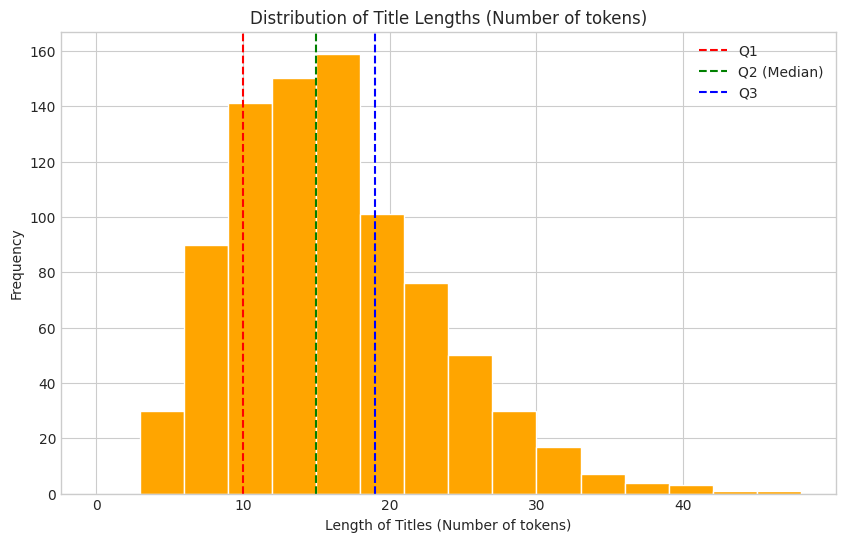

In [55]:
len_tk_title = corpus_df['TITLE'].map(lambda x: len(tokenizer.tokenize(x)))

# Calculate quartiles
q1 = np.percentile(len_tk_title, 25)
q2 = np.percentile(len_tk_title, 50)
q3 = np.percentile(len_tk_title, 75)

# Define histogram properties
fig = plt.figure(figsize=(10, 6))
bin_width = 3
list_bins= list(range(0, len_tk_title.max() + bin_width, bin_width))

# Plot histogram
plt.hist(len_tk_title, bins=list_bins, ec='w', color='orange')

# Add quartile lines
plt.axvline(q1, color='r', linestyle='--', label='Q1')
plt.axvline(q2, color='g', linestyle='--', label='Q2 (Median)')
plt.axvline(q3, color='b', linestyle='--', label='Q3')

plt.xlabel('Length of Titles (Number of tokens)')
plt.ylabel('Frequency')
plt.title('Distribution of Title Lengths (Number of tokens)')

# Add legend
plt.legend()

plt.xticks(np.arange(0, len_tk_title.max() + 1, 10))

plt.show()

# ABSTRACT

In [56]:
corpus_df['ABSTRACT']

0      El virus Zika es un Flavivirus filogenéticamen...
1      Introducción y objetivo La enfermedad por viru...
2      Caso clínico Mujer de 40 años, infectada 6 mes...
3      Introducción y objetivos Las infecciones por a...
4      Objetivo Comprender el proceso de toma de deci...
                             ...                        
855    Introducción La calcificación vascular (CV) as...
856    Antecedentes y objetivo La hiperostosis esquel...
857    Objetivos Estudiar la prevalencia de calcifica...
858    Fundamento y objetivo El índice tobillo-brazo ...
859    Fundamento y objetivo La enfermedad cardiovasc...
Name: ABSTRACT, Length: 860, dtype: object

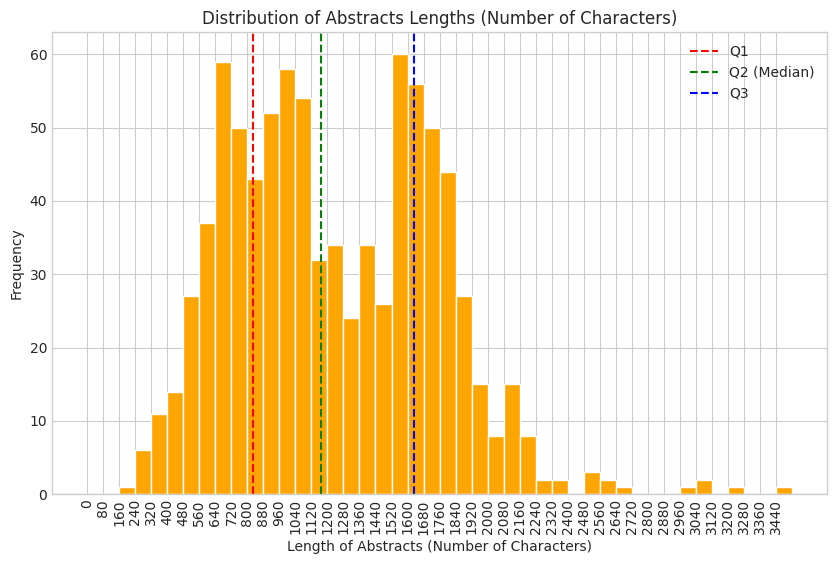

In [57]:
len_chr_abstract = corpus_df['ABSTRACT'].map(lambda x: len(x))

# Calculate quartiles
q1 = np.percentile(len_chr_abstract, 25)
q2 = np.percentile(len_chr_abstract, 50)
q3 = np.percentile(len_chr_abstract, 75)

# Define histogram properties
fig = plt.figure(figsize=(10, 6))
bin_width = 80
list_bins= list(range(0, len_chr_abstract.max() + bin_width, bin_width))

# Plot histogram
plt.hist(len_chr_abstract, bins=list_bins, ec='w', color='orange')

# Add quartile lines
plt.axvline(q1, color='r', linestyle='--', label='Q1')
plt.axvline(q2, color='g', linestyle='--', label='Q2 (Median)')
plt.axvline(q3, color='b', linestyle='--', label='Q3')

plt.xlabel('Length of Abstracts (Number of Characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Abstracts Lengths (Number of Characters)')

# Add legend
plt.legend()

plt.xticks(np.arange(0, len_chr_abstract.max() + 1, 80), rotation=90)


plt.show()

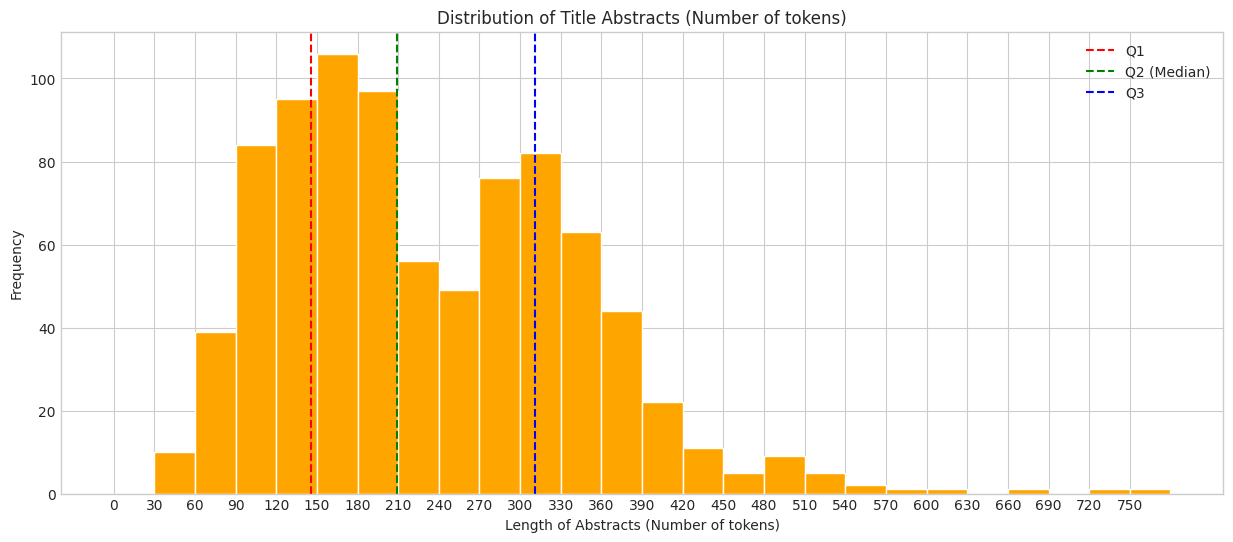

In [58]:
len_tk_abstract = corpus_df['ABSTRACT'].map(lambda x: len(tokenizer.tokenize(x)))

# Calculate quartiles
q1 = np.percentile(len_tk_abstract, 25)
q2 = np.percentile(len_tk_abstract, 50)
q3 = np.percentile(len_tk_abstract, 75)

# Define histogram properties
fig = plt.figure(figsize=(15, 6))
bin_width = 30
list_bins= list(range(0, len_tk_abstract.max() + bin_width, bin_width))

# Plot histogram
plt.hist(len_tk_abstract, bins=list_bins, ec='w', color='orange')

# Add quartile lines
plt.axvline(q1, color='r', linestyle='--', label='Q1')
plt.axvline(q2, color='g', linestyle='--', label='Q2 (Median)')
plt.axvline(q3, color='b', linestyle='--', label='Q3')

plt.xlabel('Length of Abstracts (Number of tokens)')
plt.ylabel('Frequency')
plt.title('Distribution of Title Abstracts (Number of tokens)')

# Add legend
plt.legend()

plt.xticks(np.arange(0, len_tk_abstract.max() + 1, 30))

plt.show()